In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

### 서울시 데이터 EDA화의 목적
- 개요: 처음에는 전국 데이터를 수집하여 EDA화 하여 사고율 부분을 (사고건수)/(운전면허소지자)으로 표현하였으나, 대한민국의 주요 특징인 장롱면허 인구가 다수 존재할 가능성이 있기에, 이를 정확히 수치화 하려 하였으나 전국 연령별 자동차등록 통계가 존재하지 않아 서울시 데이터를 사용하여 사고율 부분을 (사고건수)/(자동차등록수)로 표현하기로 함. 

In [3]:
pop2020_seoul = pd.read_csv('C:/Users/alscj/python/Data Science/project/data/pop2020_seoul.csv',
                              encoding='cp949')
pop2020_seoul

,age,pop,license,car
0,0~20,416854,35984,2058
1,20~29,1524869,1046051,63276
2,30~39,1523209,1480919,449470
3,40~49,1564547,1775148,701029
4,50~59,1574076,1766102,725384
5,60~,2295236,1760338,755466


In [4]:
# 단위를 축소

pop2020_seoul['pop2'] = pop2020_seoul['pop']/1000
pop2020_seoul['license2'] = pop2020_seoul['license']/1000
pop2020_seoul['car2'] = pop2020_seoul['car']/1000
pop2020_seoul

,age,pop,license,car,pop2,license2,car2
0,0~20,416854,35984,2058,416.854,35.984,2.058
1,20~29,1524869,1046051,63276,1524.869,1046.051,63.276
2,30~39,1523209,1480919,449470,1523.209,1480.919,449.470
3,40~49,1564547,1775148,701029,1564.547,1775.148,701.029
4,50~59,1574076,1766102,725384,1574.076,1766.102,725.384
5,60~,2295236,1760338,755466,2295.236,1760.338,755.466


In [5]:
# 운전면허 소지율 추가
pop2020_seoul['운전면허소지율'] = pop2020_seoul['car']/pop2020_seoul['license']*100
pop2020_seoul

,age,pop,license,car,pop2,license2,car2,운전면허소지율
0,0~20,416854,35984,2058,416.854,35.984,2.058,5.719209
1,20~29,1524869,1046051,63276,1524.869,1046.051,63.276,6.049036
2,30~39,1523209,1480919,449470,1523.209,1480.919,449.470,30.350748
3,40~49,1564547,1775148,701029,1564.547,1775.148,701.029,39.491299
4,50~59,1574076,1766102,725384,1574.076,1766.102,725.384,41.072599
5,60~,2295236,1760338,755466,2295.236,1760.338,755.466,42.915963


<Figure size 1080x720 with 0 Axes>

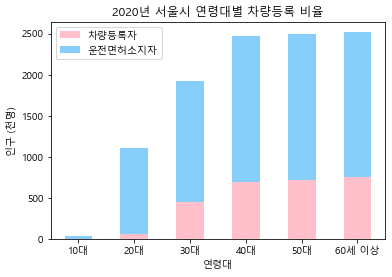

In [6]:
# 2020년 서울시 연령대별 차량등록 비율 그래프화

label = ['10대', '20대', '30대', '40대', '50대', '60세 이상']
index = np.arange(len(label))

plt.figure(figsize=(15, 10))
pop2020_seoul.plot(kind='bar', y=['car2', 'license2'], label=('차량등록자','운전면허소지자'), 
             stacked=True, color=['pink', 'lightskyblue'])
plt.title('2020년 서울시 연령대별 차량등록 비율')
plt.xlabel('연령대')
plt.ylabel('인구 (천명)')
plt.xticks(index, label, rotation=0)
plt.show()

In [7]:
print('10대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][0], 2),'%')
print('20대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][1], 2),'%')
print('30대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][2], 2),'%')
print('40대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][3], 2),'%')
print('50대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][4], 2),'%')
print('60세 차량등록율: ', round(pop2020_seoul['운전면허소지율'][5], 2),'%')

10대 차량등록율:  5.72 %
20대 차량등록율:  6.05 %
30대 차량등록율:  30.35 %
40대 차량등록율:  39.49 %
50대 차량등록율:  41.07 %
60세 차량등록율:  42.92 %


### 결론
- 위의 그래프와 같이, 연령대가 높을수록 자동차 소유 비율이 높았습니다. 학생이거나 사회초년생 비율이 높은 20대의 자동차 소유 비율이 굉장히 낮았습니다.